In [1]:
pwd # 현재 경로 확인

'/Users/shinbeompyeon/nlp_class'

# 한번에 df 만들기

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import re
from ekonlpy.sentiment import MPCK
# 1000개만 샘플: sns_full_sample(1000).csv
# 원 데이터: miseless_data/sns_full.csv

path = 'sns_full_sample(1000).csv'
# index_col= False: 첫 인덱스를 인덱스로 안 쓰겠다는 뜻
df = pd.read_csv(path, encoding='utf-8',index_col=False, header=0)

# DOCID가 분석에 의미가 없어 보여서 drop
df = df.drop(columns=['DOCID'])
# url은 필요 없음.
# 칼럼명 대문자 쓰기 번거로우니까 소문자로 바꿈
df = df.rename(columns={"SECTION": "section", "DATE": "date", "TITLE": "title", "CONTENT": "content"})
df = df[['content','date','title']]
df_original = df.copy()

# 샘플링
df =df.sample(n=1000, random_state=1)
df = df.reset_index()
sample_original = df.copy()

## sample 데이터(1000개)로 ngram 진행, str로 바꿔서 엔그램할 수 있게
df = df.astype('str') 
df = df[['date','title','content']]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
date       1000 non-null object
title      1000 non-null object
content    1000 non-null object
dtypes: object(3)
memory usage: 23.5+ KB


,date,title,content
0,20181002000000,환경부4개 광역단체 친환경에너지 전환 협력,일간보사이정윤 기자 환경부장관 김은경 서울특별시시장 박원순 인천광역시시장 박남춘 경...
1,20181204223200,울산 남구 명예사회복지 공무원 모집12101221,▽게시종료 된 글△ 울산 남구 명예사회복지 공무원 모집12101221 Indy 2...
2,20190306000000,교육안내_철도로 보는 역세권 수익형 부동산 개발 과정,안녕하세요 토지연구소 고명석 소장입니다 미세먼지가 전국을 뒤덮으면서 마스크 없이는 ...
3,20180709231600,턱라인이 고민이라면 로하셀v라인만들기 50싸게 CPH,일기 턱라인이 고민이라면 로하셀v라인만들기 50싸게 CPH 만듀 2018 7 9...
4,20180714230600,실내공기정화 제대로 시켜주는 하루산소,주방생활욕실 실내공기정화 제대로 시켜주는 하루산소 쵭 2018 7 14 2306 ...


# Tokenize, Ngramize

In [77]:
# tokenize, ngramize 함수 정의 from ekonlpy

def text2ngram(text) :
    mpck = MPCK()
    bef_tokens = mpck.tokenize(text)
    ngrams = mpck.ngramize(bef_tokens)
    tokens = []
    
    # 불용어 처리
    stoppos = ['EP','SH','SC','SY','SF','SE','SS','SP','SO','SW','SN','SSO','SSC','JKS','JKC','JKG','JKO','JKB','JKV','JKQ','JX','JC','EF','EC','ETN','ETM','XPN','XSA','XSN','XSV']
    stopword = ['']
    for tag in bef_tokens:
        if tag[1] not in stoppos:
            if tag[0] not in stopword:
                tokens.append(tag)
                
    return tokens, ngrams

In [78]:
# 토큰, ngram 생성
### content만 ngram하고, title은 안 해도 될까?

sample['tokens'] = ''
sample['ngram'] = ''

for i, row in sample.iterrows() :
    try :
        text = row['content']
        tokens,ngrams = text2ngram(text)

        row['tokens'] = ','.join(tokens) # row에 .join으로 붙여줌
        row['ngram'] = ','.join(ngrams)
        
        if i%1000 == 0 : # %: 나머지, 1000개마다 프린트
            print('{}/{}'.format(i, sample.shape[0]))    
    
    except Exception as ex: # 에러나면 에러 이름
        print("============== {} : {} ==============".format(i, str(ex)))
#         print(row['content'])

# save_file = 'ngramized.csv'
# df.to_csv(save_file, index=False)
sample.head()

611000/1000


,section,date,title,content,tokens,ngram
494088,뉴스,20181002000000,환경부4개 광역단체 친환경에너지 전환 협력,일간보사이정윤 기자 환경부장관 김은경 서울특별시시장 박원순 인천광역시시장 박남춘 경...,"보사/NNG,기자/NNG,환경부/NNG,특별시/NNG,시장/NNG,시장/NNG,지사...",
133767,블로그,20181204223200,울산 남구 명예사회복지 공무원 모집12101221,▽게시종료 된 글△ 울산 남구 명예사회복지 공무원 모집12101221 Indy 2...,"게시/NNG,종료/NNG,되/VV,글/NNG,남구/NNG,명예/NNG,사회/NNG,...",위험/NNG
702349,카페,20190306000000,교육안내_철도로 보는 역세권 수익형 부동산 개발 과정,안녕하세요 토지연구소 고명석 소장입니다 미세먼지가 전국을 뒤덮으면서 마스크 없이는 ...,"안녕/NNG,하/XSV,토지/NNG,소장/NNG,전국/NNG,뒤덮/VV,없이/MAG...",
161065,블로그,20180709231600,턱라인이 고민이라면 로하셀v라인만들기 50싸게 CPH,일기 턱라인이 고민이라면 로하셀v라인만들기 50싸게 CPH 만듀 2018 7 9...,"일기/NNG,턱/NNG,라인/NNG,고민/NNG,라인/NNG,만들/VV,싸/VA,복...",
5419,블로그,20180714230600,실내공기정화 제대로 시켜주는 하루산소,주방생활욕실 실내공기정화 제대로 시켜주는 하루산소 쵭 2018 7 14 2306 ...,"생활/NNG,욕실/NNG,실내/NNG,공기/NNG,정화/NNG,제대로/MAG,시켜/...",


In [80]:
# save_file = 'tokensample.csv'
# sample.to_csv(save_file, index=False)

# 워드 클라우드 그려보기
- 한국어의 경우, 토큰을 만들어서 넣어야 한다.
- 그냥 nltk를 쓸 경우 토큰이 이상하게 만들어짐.

In [ ]:
# import time
# start = time.time()              
# print("time: ", time.time() - start)

## 한글 토큰화 및 형태소 분석
### 한글 자연어 처리기 비교
https://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221337575742 

> 도메인에 따라 문장 유형에 따라 조금씩 다르지만  아래와 같은 결론을 내립니다.  
빠른 속도와 보통의 정확도를 원한다면 "Komoran" 또는 "Hannanum"  
(이번 분석 중 Komoran의 놀라운 발전에 감짝 놀랐습니다.)  
속도는 느리더라도 정확하고 상세한 품사 정보를 원한다면 "Kkma"  
어느 정도의 띄어쓰기 되어 있는 "인터넷" 영화평/상품명을 처리할 땐 "Okt"(이전 이름 twitter)  
(만약 띄어쓰기가 없다면 느린 처리속도는 감수해야함)  
[출처] [자연어처리] Komoran, Hannanum, Kkma, Okt 성능 비교|작성자 똑똑이  

- 뉴스: komoran, mecab 시도)
- 블로그: okt
- 카페: okt

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [5]:
# 출력을 위해 임시 클래스
class List(list):
    def __str__(self):
        return "["+",".join(["%s" % x for x in self]) +"]"

In [12]:
# 예시 텍스트
kor_text =df['content'][2]
# df['content'][320314] 

In [13]:
# 코모란(Komoran) 토큰화
from konlpy.tag import Komoran
komoran = Komoran()
komoran_tokens = komoran.morphs(kor_text)
print(List(komoran_tokens))

# 한나눔(Hannanum)
from konlpy.tag import Hannanum
hannanum = Hannanum()
hannanum_tokens = hannanum.morphs(kor_text)
print(List(hannanum_tokens))

# Okt
from konlpy.tag import Okt
okt = Okt()
okt_tokens = okt.morphs(kor_text)
print(List(okt_tokens))

# Kkma
from konlpy.tag import Kkma
kkma = Kkma()
kkma_tokens = kkma.morphs(kor_text)
print(List(kkma_tokens))


/Users/shinbeompyeon/anaconda3/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[안녕하세요,토지,연구소,고명,석,소장,이,ㅂ니다,미세먼지,가,전국,을,뒤덮,으면서,마스크,없이,는,다니,ㄹ,수,없,게,되,었,는데요,마스크,구매,시,KF,80,KF,94,라고,적히,어,있,는,지,확인,하,시,기,바라,ㅂ니다,​,오늘,은,여러분,토지,투자,에,도움,되,ㄹ,수,있,는,교육,을,소개,드리,고자,하,ㅂ니다,GTX,수도권,관역,급,행,철도,KTX,및,도시,철도,등,역세권,부동산,개발,및,투자,에,관심,을,갖,고,있,는,투자자,분,들,을,위하,아,한국경제신문,에서,저,와,함께,역세권,부동산,개발,전문가,과정,을,개설,하,았,습니다,​,최근,GTX,C,노선,의,예비,타당성,조사,통과,는,부동산,시장,의,대형,호재,로,인근,지역,에,대하,ㄴ,부동산,투자가,고조,되,고,있,는,가운데,역세권,부동산,개발,및,투자,에,대하,ㄴ,노하우,와,유형,별,성공,전략,을,체계,적,으로,학습,하,ㅁ,으로써,보다,성공,적,이,ㄴ,투자,전략,을,제시,하,는,보,ㄴ,과정,에,여러분,의,많,은,관심,을,바라,ㅂ니다,​,교육,과,관련,하,ㄴ,내용,은,아래,와,같,습니다,내, , , ,용,교육,대상,·,부동산,관련,투자,기관,및,자산,관리,기관,임직원,·,부동산,개발,시,행사,건설사,투자,컨설팅,기관,임직원,·,변호사,회계사,건축사,감정평가사,등,전문직,종사자,·,기타,부동산,개발,및,투자,에,관심,있,는,일반인,​,교육,목표,자세,하,ㄴ,사항,아래,도표,참조,·,역세권,부동산,개발,및,투자,에,대하,ㄴ,체계,적,이,ㄴ,분석,·,사업,기획,실행,관리,개발이익,환수,등,단계,별,핵심,내용,파악,·,철도,와,부동산,개발,을,연계,하,ㄴ,국내외,개발,모델,성공,사례,분석,교육,일정,·,1,일차,20190326,화,19,시,22,시,·,2,일차,20190328,목,19,시,22,시,·,3,일차,20190402,화,19,시,22,시,·,4,일차,20190404,목,19,시,22,시,·,5,일차,20190409,화,19,시,22,시,​,교육,장소,기타,·,교육비,인당,50,만원,2,이,ㄴ,이상,

## 2.3 한글 품사 부착(PoS Tagging)
PoS Tag 목록

In [14]:
# 코모란(Komoran) 품사 태깅
komoranTag = []
for token in komoran_tokens:
    komoranTag += komoran.pos(token)
print(komoranTag[:10])

# 한나눔(Hannanum)
hannanumTag = []
for token in hannanum_tokens:
    hannanumTag += hannanum.pos(token)
print(hannanumTag[:10])

# Okt
oktTag = []
for token in okt_tokens:
    oktTag += okt.pos(token)
print(oktTag[:10])

# Kkma
kkmaTag = []
for token in kkma_tokens:
    kkmaTag += kkma.pos(token)
print(kkmaTag[:10])

[('안녕하세요', 'NNP'), ('토지', 'NNP'), ('연구소', 'NNP'), ('고명', 'NNP'), ('석', 'MM'), ('소장', 'NNP'), ('이', 'MM'), ('ㅂ니다', 'EC'), ('미세먼지', 'NNP'), ('가', 'VV')]
[('안녕', 'I'), ('하', 'I'), ('세', 'N'), ('요', 'M'), ('토지연구소', 'N'), ('고명석', 'N'), ('소장', 'N'), ('이', 'M'), ('ㅂ니', 'N'), ('이', 'J')]
[('안녕하세요', 'Adjective'), ('토지', 'Noun'), ('연구소', 'Noun'), ('고', 'Noun'), ('명석', 'Noun'), ('소장', 'Noun'), ('입니다', 'Adjective'), ('미세먼지', 'Noun'), ('가', 'Verb'), ('전국', 'Noun')]
[('안녕', 'NNG'), ('하세', 'NNG'), ('요', 'NNG'), ('토지', 'NNG'), ('연구소', 'NNG'), ('이', 'NNG'), ('고', 'NNG'), ('명석', 'XR'), ('소장', 'NNG'), ('이', 'NNG')]



## 2.4 불용어(Stopword) 처리
분석에 불필요한 품사를 제거하고, 불필요한 단어 제거

In [15]:
# 불용어 처리
stopPos = ['Suffix', 'Punctuation','Josa','Foreign','Alpha','Number']

# 최빈어 조회, 최빈어를 조회하여 불용어 제거 대상 선정
from collections import Counter
Counter (oktTag).most_common()

# stopword 예시
# stopWord = ['의','이','를','은','과','수','했다','것','있는','한다',
#             '하는','그','있다','할','이런','되']
stopWord = ['의','이','를','은','과','수','했다','것','있는','한다',
            '하는','그','있다','할','이런','되']

word = []
for tag in oktTag:
    if tag[1] not in stopPos:
        if tag[0] not in stopWord:
            word.append(tag[0])
print(word)

['안녕하세요', '토지', '연구소', '고', '명석', '소장', '입니다', '미세먼지', '가', '전국', '뒤', '덮으면서', '마스크', '없이는', '다닐', '없게', '되었는데요', '마스크', '구매', '시', '적혀있는', '지', '확인', '하시기', '바랍니다', '오늘', '여러분', '토지', '투자', '도움', '될', '교육', '소개', '드리고자', '합니다', '수도권', '관역', '급행', '철도', '및', '도시철도', '등', '역세', '권', '부동산', '개발', '및', '투자', '관심', '갖고', '투자자', '위해', '한국', '경', '제', '신문', '저', '와', '함께', '역세', '권', '부동산', '개발', '전문가', '과정', '개설', '하였습니다', '최근', '노선', '예비', '타당성', '조사', '통과', '는', '부동산', '시장', '대형', '호재', '로', '인근', '지역', '대한', '부동산', '투자가', '고조', '되고', '가운데', '역세', '권', '부동산', '개발', '및', '투자', '대한', '노하우', '와', '유형', '별', '성', '공', '전략', '체계', '적', '학습', '함', '보다', '성공', '적', '인', '투자', '전략', '제시', '본', '과정', '여러분', '많은', '관심', '바랍니다', '교육', '관련', '한', '내용', '아래', '와', '같습니다', '내', '용', '교육', '대상', '부동산', '관련', '투자', '기관', '및', '자산', '관리', '기관', '임', '직원', '부동산', '개발', '시', '행사', '건설', '사', '투자', '컨설팅', '기관', '임', '직원', '변호사', '회계사', '건축사', '감정평가사', '등', '전문직', '종사', '자', '기타', '부동산', '개발', '및', '투자', '관심'

# 워드클라우드 from KoNLPy by LucyPark

In [1]:
#! /usr/bin/python2.7
# -*- coding: utf-8 -*-

from collections import Counter
import urllib
import random
import webbrowser
import pygame
import simplejson

from konlpy.tag import Hannanum
from lxml import html
import pytagcloud # requires Korean font support
import sys


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


ConnectionResetError: [Errno 54] Connection reset by peer

In [17]:
pwd

'/Users/shinbeompyeon/nlp_class'

# wordcloud 패키지 이용 워드클라우드
- '공백'을 기준으로 하기 때문에 '한글'에는 적합하지 않음.


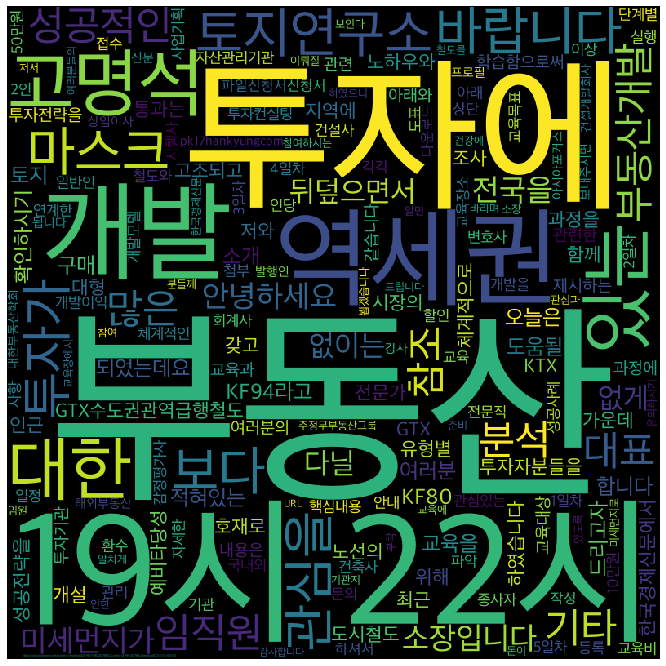

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = 'indiego/system/libraries/Fonts/AppleSDGothicNeo.ttc'
wordcloud = WordCloud(
    font_path = font_path,
    width = 600,
    height = 600
    )

wordcloud = wordcloud.generate(kor_text) 
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [ ]:
# 맷플랏에서 한글 설정법
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

##### 위에꺼 해보고 아래꺼도 https://pinkwink.kr/990
# from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="indiego/system/libraries/Fonts/AppleSDGothicNeo.ttc").get_name()
# rc('font', family=font_name)

In [1]:
kor_text

NameError: name 'kor_text' is not defined

# Konlypy이용 워드클라우드
- https://pinkwink.kr/1029 참조
- 한국어 형태소 분해로

In [7]:
# 예시 텍스트
kor_text =df['content'][2]
kor_text
# df['content'][320314] 

'안녕하세요 토지연구소 고명석 소장입니다 미세먼지가 전국을 뒤덮으면서 마스크 없이는 다닐 수 없게 되었는데요 마스크 구매 시 KF80 KF94라고 적혀있는 지 확인하시기 바랍니다 \u200b 오늘은 여러분 토지 투자에 도움될 수 있는 교육을 소개 드리고자 합니다 GTX수도권관역급행철도 KTX 및 도시철도 등 역세권 부동산 개발 및 투자에 관심을 갖고 있는 투자자분들을 위해 한국경제신문에서 저와 함께 역세권 부동산 개발 전문가 과정을 개설 하였습니다 \u200b 최근 GTX C 노선의 예비타당성 조사 통과는 부동산 시장의 대형 호재로 인근 지역에 대한 부동산 투자가 고조되고 있는 가운데 역세권 부동산 개발 및 투자에 대한 노하우와 유형별 성공전략을 체계적으로 학습함으로써 보다 성공적인 투자전략을 제시하는 본 과정에 여러분의 많은 관심을 바랍니다 \u200b 교육과 관련한 내용은 아래와 같습니다  내\xa0\xa0\xa0 용   교육대상 · 부동산 관련 투자기관 및 자산관리기관 임직원 · 부동산개발 시행사 건설사 투자컨설팅 기관 임직원 · 변호사 회계사 건축사 감정평가사 등 전문직 종사자 · 기타 부동산 개발 및 투자에 관심있는 일반인 \u200b  교육목표 자세한 사항 아래 도표 참조 · 역세권 부동산개발 및 투자에 대한 체계적인 분석 · 사업기획 실행 관리 개발이익 환수 등 단계별 핵심내용 파악 · 철도와 부동산 개발을 연계한 국내외 개발모델 성공사례 분석  교육 일정 · 1일차  20190326 화 19시  22시 · 2일차  20190328 목 19시  22시 · 3일차  20190402 화 19시  22시 · 4일차  20190404 목 19시  22시 · 5일차  20190409 화 19시  22시 \u200b  교육장소  기타 · 교육비  인당 50만원 2인 이상 등록 시 각각 10만원 할인 · 문의  023604049 · 접수  상단 안내 및 첨부 파일신청서 다운로드\xa0하셔서\xa0 \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa

In [10]:
# komoran 예시
from konlpy.tag import Komoran
komoran = Komoran()
# print(komoran.morphs(kor_text))
print(komoran.nouns(kor_text))
# print(komoran.pos(kor_text))

['안녕하세요', '토지', '연구소', '고명', '석', '소장', '미세먼지', '전국', '마스크', '수', '마스크', '구매', '시', '80', '라고', '지', '확인', '오늘', '여러분', '토지', '투자', '도움', '수', '교육', '소개', '수도권', '관역', '급', '행', '철도', '도시', '철도', '등', '역세권', '부동산', '개발', '투자', '관심', '투자자', '한국경제신문', '역세권', '부동산', '개발', '전문가', '과정', '개설', '최근', '노선', '예비', '타당성', '조사', '통과', '부동산', '시장', '대형', '호재', '인근', '지역', '부동산', '투자가', '고조', '가운데', '역세권', '부동산', '개발', '투자', '노하우', '유형', '성공', '전략', '체계', '학습', '성공', '투자', '전략', '제시', '과정', '관심', '교육', '관련', '내용', '아래', '내', '용', '교육', '대상', '부동산', '관련', '투자', '기관', '자산', '관리', '기관', '임직원', '부동산', '개발', '시', '행사', '건설사', '투자', '컨설팅', '기관', '임직원', '변호사', '회계사', '건축사', '감정평가사', '등', '전문직', '종사자', '기타', '부동산', '개발', '투자', '관심', '일반인', '교육', '목표', '사항', '아래', '도표', '참조', '역세권', '부동산', '개발', '투자', '체계', '분석', '사업', '기획', '실행', '관리', '개발이익', '환수', '등', '단계', '핵심', '내용', '파악', '철도', '부동산', '개발', '연계', '국내외', '개발', '모델', '성공', '사례', '분석', '교육', '일정', '일차', '화', '시', '시', '일차', '목', '시', '시', '일차', '화', '시'

In [ ]:
import nltk
import konlpy.corpus import kolaw
from konlpy.tag import okt 
# okt: 트위터에서 시작했기 때문에 일상어에 유리
# mecab: 속도 중시한다면 mecab


# 카드매출 데이터

In [ ]:
path = 'CARD_SPENDING_190809.txt'
# index_col= False: 첫 인덱스를 인덱스로 안 쓰겠다는 뜻
card = pd.read_csv(path, encoding='utf-8',index_col=False, header=0, sep='|t')
card.head()

